# **Práctica 1: Análisis exploratorio de datos**

Nombre:

No. Cuenta:

Email:

### **Contexto**

El sector inmobiliario de Melbourne, Australia continúa en auge desde hace algunos años. 
Es de interés conocer la tendencia inmobiliaria en dicha ciudad debido a que cada vez es más difícil adquirir una unidad de 2 dormitorios a un precio razonable.

**Objetivo:** Encontrar información de interés para predecir la próxima tendencia inmobiliaria en Melbourne.


**Fuente de datos**

* 1) Rooms: Número de habitaciones.
* 2) Price: Precio en dolares.
* 3) Method: S - propiedad vendida; SP - propiedad vendida antes; PI - propiedad transferida; PN - vendida antes no revelada; SN - vendida no revelada; NB - sin oferta; VB - oferta del proveedor; W - retirada antes de la subasta; SA - vendida después de subasta; SS - vendida después del precio de subasta no revelado. N/A - precio u oferta más alta no disponible.
* 4) Type: br - dormitorio (s); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; dev site – en desarrollo; o res - otro residencial.
* 5) SellerG: Agente de bienes raíces.
* 6) Date: Fecha de venta.
* 7) Distance: Distancia del CBD (Centro de negocios).
* 8) Regionname: Región general (oeste, noroeste, norte, noreste ...).
* 9) Propertycount: Número de propiedades que existen en el suburbio.
* 10) Bedroom2: Número de dormitorios (de otra fuente).
* 11) Bathroom: Cantidad de baños.
* 12) Car: Número de estacionamientos.
* 13) Landsize: Tamaño del terreno.
* 14) BuildingArea: Tamaño del edificio.
* 15) CouncilArea: Consejo de gobierno de la zona (Municipio).


### **Importar las bibliotecas y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno

In [5]:
DatosMelbourne = pd.read_csv("230314COVID19MEXICO.csv")
DatosMelbourne

C:\Users\Imanol\AppData\Local\Temp\ipykernel_10476\3620143755.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  DatosMelbourne = pd.read_csv("230314COVID19MEXICO.csv")


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-03-14,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2023-03-14,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97
2,2023-03-14,1c80d5,1,6,3,1,14,3,3,1,...,2,1,1,2,97,3,99,México,97,97
3,2023-03-14,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,México,97,97
4,2023-03-14,1a4a8d,1,12,23,2,27,23,8,1,...,2,2,97,1,2,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984057,2023-03-14,m174a3e,2,12,15,1,15,15,999,1,...,99,1,3,2,97,6,99,México,97,97
6984058,2023-03-14,m0d6591,2,12,15,1,15,15,999,1,...,99,2,97,2,97,6,99,México,97,97
6984059,2023-03-14,m02478f,2,12,15,2,15,15,999,1,...,99,2,97,2,97,6,99,México,97,97
6984060,2023-03-14,m00bd1a,2,12,15,1,15,15,999,1,...,99,2,97,2,97,6,99,México,97,97


Tipo:

br - dormitorio(s);

h - casa, cabaña, villa, semi, terraza; 

u - unidad, dúplex; 

t - casa adosada; 

dev site - sitio de desarrollo; o 

res - otro residencial.

In [7]:
DatosMelbourne.head(10)
#DatosMelbourne.tail(10) diez elementos

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-03-14,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2023-03-14,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97
2,2023-03-14,1c80d5,1,6,3,1,14,3,3,1,...,2,1,1,2,97,3,99,México,97,97
3,2023-03-14,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,México,97,97
4,2023-03-14,1a4a8d,1,12,23,2,27,23,8,1,...,2,2,97,1,2,7,99,México,97,97
5,2023-03-14,1933c0,1,12,9,2,9,9,7,1,...,2,2,97,1,2,7,99,México,97,97
6,2023-03-14,1e6dad,1,12,7,1,6,7,12,1,...,2,2,97,2,97,6,99,México,97,97
7,2023-03-14,06e951,1,12,24,2,24,24,28,1,...,2,2,97,1,2,7,99,México,97,97
8,2023-03-14,1dc542,1,6,12,1,12,12,29,1,...,1,2,97,1,2,7,99,México,97,97
9,2023-03-14,0f43ef,1,12,22,1,9,22,14,1,...,1,1,2,1,2,7,99,México,97,97


Método:

S - propiedad vendida; 
SP - propiedad vendida antes; 
PI - propiedad transferida; 
PN - vendido antes no revelado; 
SN - vendido no revelado; 
NB - sin oferta; 
VB - oferta del proveedor; 
W - retirado antes de la subasta; 
SA - vendido después de subasta; 
SS - vendido después del precio de subasta no revelado. 
N/A - precio o oferta más alta no disponible.

### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [8]:
DatosMelbourne.shape

(6984062, 40)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [10]:
DatosMelbourne.dtypes

FECHA_ACTUALIZACION      object
ID_REGISTRO              object
ORIGEN                    int64
SECTOR                    int64
ENTIDAD_UM                int64
SEXO                      int64
ENTIDAD_NAC               int64
ENTIDAD_RES               int64
MUNICIPIO_RES             int64
TIPO_PACIENTE             int64
FECHA_INGRESO            object
FECHA_SINTOMAS           object
FECHA_DEF                object
INTUBADO                  int64
NEUMONIA                  int64
EDAD                      int64
NACIONALIDAD              int64
EMBARAZO                  int64
HABLA_LENGUA_INDIG        int64
INDIGENA                  int64
DIABETES                  int64
EPOC                      int64
ASMA                      int64
INMUSUPR                  int64
HIPERTENSION              int64
OTRA_COM                  int64
CARDIOVASCULAR            int64
OBESIDAD                  int64
RENAL_CRONICA             int64
TABAQUISMO                int64
OTRO_CASO                 int64
TOMA_MUE

Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante e int).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [11]:
DatosMelbourne.isnull().sum()

FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
MIGRANTE                 0
P

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [12]:
DatosMelbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6984062 entries, 0 to 6984061
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

# **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

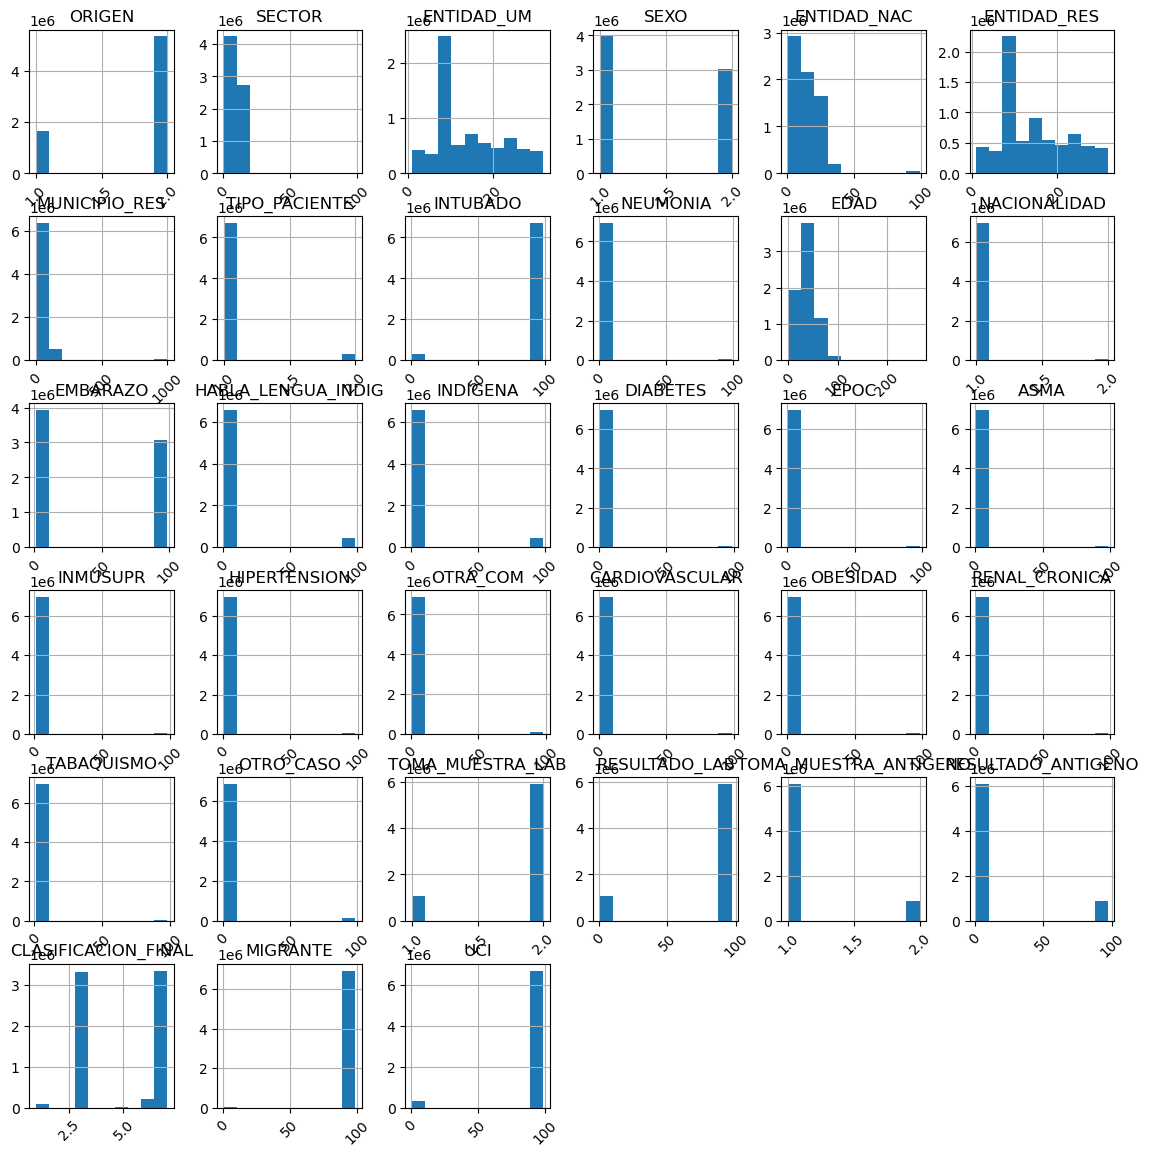

In [13]:
DatosMelbourne.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma, se observa que **BuildingArea** y **LandSize** tienen valores sesgados a la izquierda. La variable **Price** también está sesgada hacia la izquierda. **YearBuilt** está sesgado hacia la derecha y el límite comienza en 1200, lo cual es extraño.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [14]:
DatosMelbourne.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
count,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,...,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06,6.984062e+06
mean,1.765707e+00,7.795307e+00,1.453996e+01,1.431604e+00,1.563409e+01,1.473025e+01,3.769855e+01,1.042934e+00,9.292418e+01,2.937545e+00,...,2.344146e+00,2.312744e+00,3.854194e+00,1.845515e+00,8.228809e+01,1.126788e+00,1.361289e+01,4.991236e+00,9.833076e+01,9.292437e+01
std,4.235563e-01,3.953264e+00,7.914868e+00,4.953000e-01,1.068953e+01,7.862741e+00,9.046264e+01,2.027094e-01,1.925550e+01,9.580514e+00,...,5.801820e+00,5.829792e+00,1.412965e+01,3.614131e-01,3.441933e+01,3.327355e-01,3.177791e+01,2.009359e+00,8.040256e+00,1.925466e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,1.000000e+00,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,9.000000e+00,1.100000e+01,1.000000e+00,1.400000e+01,1.300000e+01,1.500000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,2.000000e+00,6.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.100000e+01,2.000000e+00,2.100000e+01,2.100000e+01,3.900000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,...,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores perdidos. Estos son: **Car**, **Landsize** y **YearBuilt**.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

In [15]:
VariablesValoresAtipicos = ['Price', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=DatosMelbourne)
  plt.show()

C:\Users\Imanol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Price'

Se observa que Landsize, Buildingarea y YearBuilt tienen valores atípicos que están lejos de los otros valores.

**4) Distribución de variables categóricas**

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [13]:
DatosMelbourne.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


* Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.
* Se observa que algunas clases tienen demasiados valores únicos, como Address, seguida de Suburb y SellerG. 
* A partir de estos hallazgos, se puede a manera de ejemplo graficar las variables con 10 o menos clases únicas.

**Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


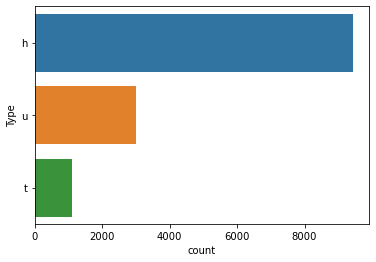

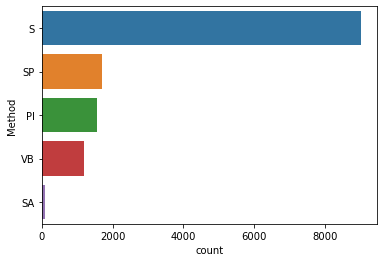

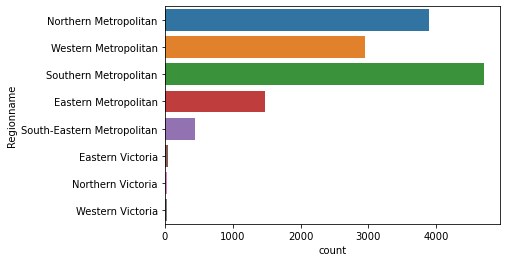

In [29]:
for col in DatosMelbourne.select_dtypes(include='object'):
  if DatosMelbourne[col].nunique()<10:sns.countplot(y=col, data=DatosMelbourne)
  plt.show()

**5) Agrupación por variables categóricas**





In [15]:
for col in DatosMelbourne.select_dtypes(include='object'):
  if DatosMelbourne[col].nunique() < 10:
    display(DatosMelbourne.groupby(col).agg(['mean']))

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,
h,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.771222,617.181924,176.866248,1954.081176,-37.803795,144.994700,7259.025505
t,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,140.046323,1998.988189,-37.815782,144.996489,7094.459605
u,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128358,477.314219,80.737121,1980.016708,-37.823710,144.996363,8199.280080


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Method,,,,,,,,,,,,,
PI,3.077366,1.133242e+06,9.482097,3106.742327,3.062660,1.714194,1.703918,521.682864,158.783107,1965.621106,-37.814429,145.001865,7749.644501
S,2.941809,1.087327e+06,10.431523,3106.171359,2.914875,1.498781,1.602581,531.129905,155.781647,1963.382091,-37.808204,144.997012,7496.049435
SA,3.010870,1.025772e+06,12.385870,3132.304348,3.010870,1.554348,1.769231,699.532609,151.454318,1979.340000,-37.818112,145.023262,6945.902174
SP,2.795655,8.998924e+05,10.374692,3096.480916,2.785672,1.456254,1.560472,469.346447,128.631366,1968.742958,-37.804809,144.972983,7093.759248
VB,2.924103,1.166510e+06,8.273728,3107.337781,2.896580,1.675563,1.602359,927.331943,152.419093,1965.464807,-37.815460,145.002459,7307.331943


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792916,634.133923,178.001521,1971.859903,-37.788820,145.129184,5713.788579
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,183.645000,1984.032258,-37.959292,145.324428,8872.358491
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454123,568.948072,124.177723,1962.764286,-37.747258,144.981176,9485.602057
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.925000,3355.463415,1746.374286,1986.666667,-37.599620,144.838486,4260.975610
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,162.734296,1976.859504,-37.993727,145.145865,6589.366667
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576264,509.252183,153.580962,1960.523777,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696392,493.606852,144.697623,1968.155192,-37.782382,144.862512,5561.785957
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,134.683810,1982.565217,-37.695163,144.569906,4191.156250


### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [16]:
DatosMelbourne.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


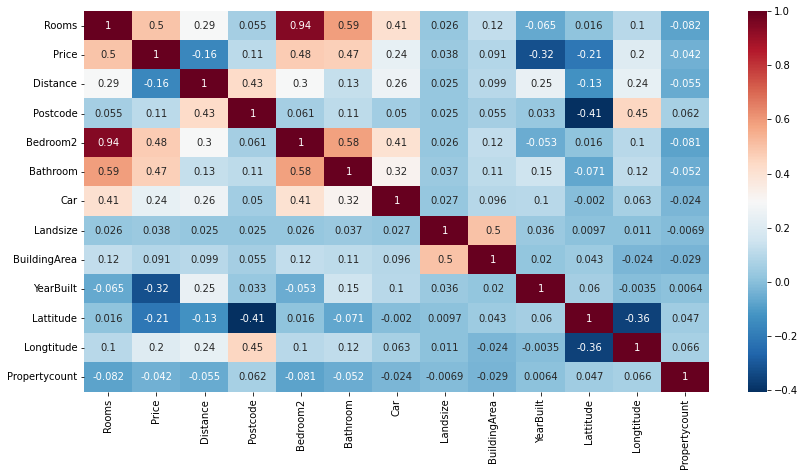

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True)
plt.show()

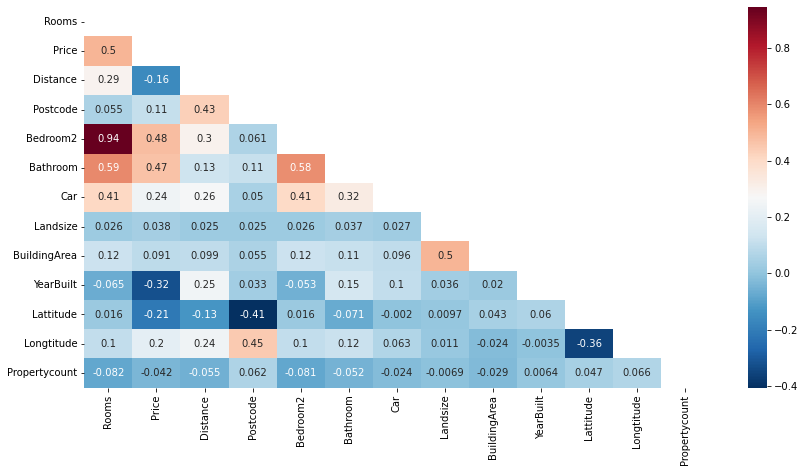

In [18]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosMelbourne.corr())
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.
